In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [3]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\car_prediction_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.shape

(301, 9)

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

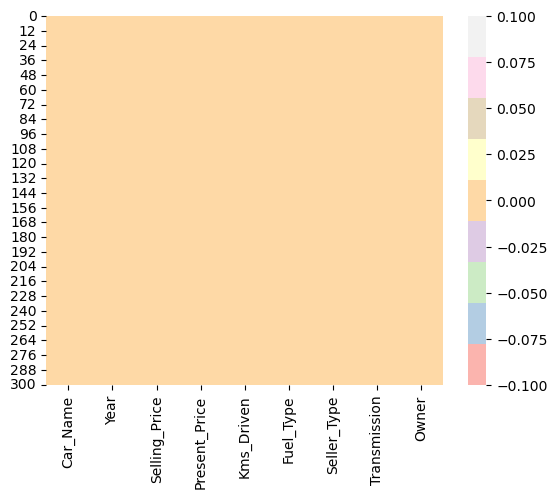

In [8]:
sns.heatmap(df.isnull(), cmap='Pastel1')
plt.show()

In [9]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [21]:
label_encoder= LabelEncoder()
cat_col=['Car_Name','Fuel_Type','Seller_Type','Transmission']
for col in cat_col:
    df[col]=df[col].astype(str)
    df[col]=label_encoder.fit_transform(df[col])

In [22]:
x = df.drop(columns=['Present_Price'])
y = df['Present_Price']

In [23]:
x

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,27000,2,0,1,0
1,93,2013,4.75,43000,1,0,1,0
2,68,2017,7.25,6900,2,0,1,0
3,96,2011,2.85,5200,2,0,1,0
4,92,2014,4.60,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,9.50,33988,1,0,1,0
297,66,2015,4.00,60000,2,0,1,0
298,69,2009,3.35,87934,2,0,1,0
299,69,2017,11.50,9000,1,0,1,0


In [24]:
y

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [26]:
model=LinearRegression()

In [27]:
model

LinearRegression()

In [28]:
y_pred=model.fit(x_train,y_train).predict(x_test)
y_pred

array([-2.03720084, 14.90112989,  8.99661622,  3.42479471, 11.86116926,
       10.66295923,  0.99653677,  0.65870233, -1.18177312,  9.01507546,
       11.74101944,  2.36812179, 10.96877673, -3.31926792, 10.2064501 ,
        5.18186511,  2.52292159, 25.92126168, -1.6764142 ,  0.59636382,
        0.77573387, 11.28829716,  9.34861672,  6.57339497,  0.23028766,
        7.24372413,  8.72491077,  6.05587058, -0.29973043,  0.45968055,
        0.98412088, 12.91985562,  2.49743909,  7.19303949, 10.66347908,
        5.45970911,  9.78310525,  9.36788421,  5.6126941 , 10.18988728,
       11.85261793,  8.70569414,  6.71025678,  0.7597136 ,  9.3246674 ,
        1.36387958, 10.00086682, 10.55197395,  6.94709982,  5.61106004,
        8.24099353, -0.12689281, 37.25207556, 34.82231246, 12.66285962,
       15.63390788,  7.88026827, 13.40512179,  8.25729158,  9.81993495,
        0.7676781 ])

In [29]:
mse = mean_squared_error(y_test, y_pred)  
mse

10.772617882023935

In [32]:
r2 = r2_score(y_test, y_pred)
r2

0.7864129737318191

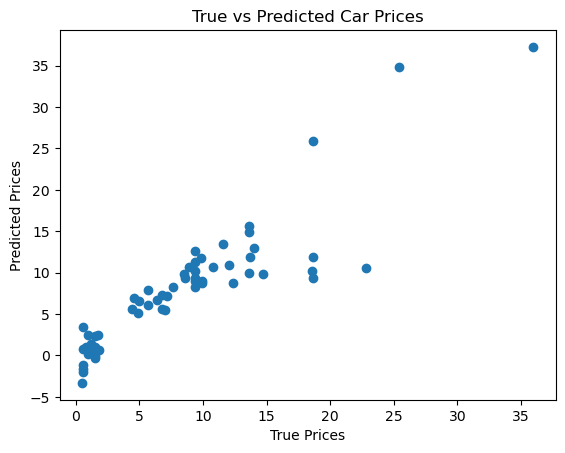

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted Car Prices")
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

3.28216664446276

In [39]:
lr_model = LinearRegression()
lr_score = cross_val_score(lr_model, x_train, y_train, cv=5)
lr_score

array([0.76276252, 0.77251164, 0.7328019 , 0.72567987, 0.86678115])

In [41]:
ridge_model = Ridge(alpha=1.0)
ridge_score = cross_val_score(ridge_model, x_train, y_train, cv=5)
ridge_score

array([0.76246996, 0.77381035, 0.73626482, 0.72841119, 0.86972942])

In [43]:
lasso_model = Lasso(alpha=1.0)
lasso_score = cross_val_score(lasso_model, x_train, y_train, cv=5)
lasso_score

array([0.70443754, 0.76401729, 0.76352656, 0.78431033, 0.89205421])

In [47]:
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mse
lr_r2 = r2_score(y_test, lr_predictions)
lr_r2*100

78.64129737318191

In [45]:
ridge_model.fit(x_train, y_train)
ridge_predictions = ridge_model.predict(x_test)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_r2*100

78.77164760088576

In [46]:
lasso_model.fit(x_train, y_train)
lasso_predictions = lasso_model.predict(x_test)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_r2*100

79.75344281955891

In [ ]:
model.predict([[